### Import Libraries

In [1]:
from PIL import Image
from collections import Counter
import random
import tracemalloc
import numpy as np
import pandas as pd

### Functions For Image Processing

#### Function to apply a filter to get the right size of frame

In [2]:
# basic idea: frame_size equals to the most frequently appeared value except total x or y length
def filter_frame(list, max_len):
    dict = Counter(list)
    if dict.most_common(1)[0][0] < max_len:
        length = dict.most_common(1)[0][0]
    else:
        length = dict.most_common(2)[1][0]
        
    return length

#### Function to apply a filter to get the right size of cell size and wall size

In [3]:
def filter_cell_wall(list):
    # remove noise value (apprearance frequency < 20%)
    dict_origin = Counter(list)
    res = [ele for ele in list if dict_origin[ele] > (len(list) * 0.2)]
    # among values left, sort them, and the cell size should be the smallest among them
    dict_filter = Counter(res)
    dict_sort = sorted(dict_filter.items())
    # if two adjacent smallest value appears and both in high frequency (> 20%), then use their average
    if len(dict_sort) > 1:
        if dict_sort[0][0] - dict_sort[1][0] == -1:
            length = (dict_sort[0][0] + dict_sort[1][0]) / 2
        else:
            length = dict_sort[0][0]
    elif len(dict_sort) == 1:
        length = dict_sort[0][0]
    else:
        print('error! no length has frequency more than 20%! need to check manually!')
    
    return length


#### Function that returns the size of blank space as list (top, bottom, left, right)

##### 1) Maze with 1 channel (each line's size of blank space)

In [4]:
def blank_list1():
    # top
    frame_top_list = []
    frame_top = 0
    for i in range(im.size[0]):
        frame_top = 0
        j = 0
        while (px[i, j] >= 200) & (j < im.size[1]-1):
            frame_top += 1
            j += 1
        if px[i,j] >= 200:
            frame_top += 1
        if frame_top != 0:
            frame_top_list.append(frame_top)

    # bottom
    frame_bottom_list = []
    frame_bottom = 0
    for i in range(im.size[0]):
        frame_bottom = 0
        j = im.size[1] - 1
        while (px[i, j] >= 200) & (j > 0):
            frame_bottom += 1
            j -= 1
        if px[i,j] >= 200:
            frame_bottom += 1
        if frame_bottom != 0:
            frame_bottom_list.append(frame_bottom)

    # left
    frame_left_list = []
    frame_left = 0
    for j in range(im.size[1]):
        frame_left = 0
        i = 0
        while (px[i, j] >= 200) & (i < im.size[0]-1):
            frame_left += 1
            i += 1
        if px[i,j] >= 200:
            frame_left += 1
        if frame_left != 0:
            frame_left_list.append(frame_left)        

    # right
    frame_right_list = []
    frame_right = 0
    for j in range(im.size[1]):
        frame_right = 0
        i = im.size[0] - 1
        while (px[i, j] >= 200) & (i > 0):
            frame_right += 1
            i -= 1
        if px[i,0] >= 200:
            frame_right += 1
        if frame_right != 0:
            frame_right_list.append(frame_right)     
    
    return frame_top_list, frame_bottom_list, frame_left_list, frame_right_list

##### 2) Maze with more than 1 channel  (each line's size of blank space)

In [5]:
def blank_list2():
    # top
    frame_top_list = []
    frame_top = 0
    for i in range(im.size[0]):
        frame_top = 0
        j = 0
        while (px[i, j][0] >= 200) & (j < im.size[1]-1):
            frame_top += 1
            j += 1
        if px[i,j][0] >= 200:
            frame_top += 1
        if frame_top != 0:
            frame_top_list.append(frame_top)

    # bottom
    frame_bottom_list = []
    frame_bottom = 0
    for i in range(im.size[0]):
        frame_bottom = 0
        j = im.size[1] - 1
        while (px[i, j][0] >= 200) & (j > 0):
            frame_bottom += 1
            j -= 1
        if px[i,j][0] >= 200:
            frame_bottom += 1
        if frame_bottom != 0:
            frame_bottom_list.append(frame_bottom)

    # left
    frame_left_list = []
    frame_left = 0
    for j in range(im.size[1]):
        frame_left = 0
        i = 0
        while (px[i, j][0] >= 200) & (i < im.size[0]-1):
            frame_left += 1
            i += 1
        if px[i,j][0] >= 200:
            frame_left += 1
        if frame_left != 0:
            frame_left_list.append(frame_left)        

    # right
    frame_right_list = []
    frame_right = 0
    for j in range(im.size[1]):
        frame_right = 0
        i = im.size[0] - 1
        while (px[i, j][0] >= 200) & (i > 0):
            frame_right += 1
            i -= 1
        if px[i,0][0] >= 200:
            frame_right += 1
        if frame_right != 0:
            frame_right_list.append(frame_right)     

    return frame_top_list, frame_bottom_list, frame_left_list, frame_right_list

#### Decide the x-length of state (len_x) and wall (len_x_wall)

In [6]:
def state_wall_x1(top=0, bottom=0, left=0, right=0):
    len_x = []
    len_x_wall = []
    #for i in range(im.size[0]):
    for i in range(frame_left, im.size[0] - frame_right):

        px_count_x = 0
        px_count_x_wall = 0

        for j in range(frame_top, im.size[1] - frame_bottom):
            #remove [0] if pixel is int
            if px[i, j] >= 200:
                if px_count_x_wall != 0:
                    len_x_wall.append(px_count_x_wall)
                px_count_x_wall = 0
                px_count_x += 1
            else:
                if px_count_x != 0:
                    len_x.append(px_count_x)
                px_count_x = 0
                px_count_x_wall += 1

        if px_count_x != 0:
            len_x.append(px_count_x)
        if px_count_x_wall != 0:
            len_x_wall.append(px_count_x_wall)

    len_x.sort()
    len_x_wall.sort()
    
    return len_x, len_x_wall

In [7]:
def state_wall_x2(top=0, bottom=0, left=0, right=0):
    len_x = []
    len_x_wall = []
    #for i in range(im.size[0]):
    for i in range(frame_left, im.size[0] - frame_right):

        px_count_x = 0
        px_count_x_wall = 0

        for j in range(frame_top, im.size[1] - frame_bottom):
            #remove [0] if pixel is int
            if px[i, j][0] >= 200:
                if px_count_x_wall != 0:
                    len_x_wall.append(px_count_x_wall)
                px_count_x_wall = 0
                px_count_x += 1
            else:
                if px_count_x != 0:
                    len_x.append(px_count_x)
                px_count_x = 0
                px_count_x_wall += 1

        if px_count_x != 0:
            len_x.append(px_count_x)
        if px_count_x_wall != 0:
            len_x_wall.append(px_count_x_wall)

    len_x.sort()
    len_x_wall.sort()
    
    return len_x, len_x_wall

#### Decide the y-length of state (len_y) and wall (len_y_wall)

In [8]:
def state_wall_y1(top=0, bottom=0, left=0, right=0):
    len_y = []
    len_y_wall = []
    for j in range(frame_top, im.size[1] - frame_bottom):

        px_count_y = 0
        px_count_y_wall = 0    

        for i in range(frame_left, im.size[0] - frame_right):
            #remove [0] if pixel is int
            if px[i, j] >= 200:
                if px_count_y_wall != 0:
                    len_y_wall.append(px_count_y_wall)
                px_count_y_wall = 0
                px_count_y += 1
            else:
                if px_count_y != 0:
                    len_y.append(px_count_y)
                px_count_y = 0
                px_count_y_wall += 1

        if px_count_y != 0:
            len_y.append(px_count_y)
        if px_count_y_wall != 0:
            len_y_wall.append(px_count_y_wall)

    len_y.sort()
    len_y_wall.sort()
    
    return len_y, len_y_wall

In [9]:
def state_wall_y2(top=0, bottom=0, left=0, right=0):
    len_y = []
    len_y_wall = []
    for j in range(frame_top, im.size[1] - frame_bottom):

        px_count_y = 0
        px_count_y_wall = 0    

        for i in range(frame_left, im.size[0] - frame_right):
            #remove [0] if pixel is int
            if px[i, j][0] >= 200:
                if px_count_y_wall != 0:
                    len_y_wall.append(px_count_y_wall)
                px_count_y_wall = 0
                px_count_y += 1
            else:
                if px_count_y != 0:
                    len_y.append(px_count_y)
                px_count_y = 0
                px_count_y_wall += 1

        if px_count_y != 0:
            len_y.append(px_count_y)
        if px_count_y_wall != 0:
            len_y_wall.append(px_count_y_wall)

    len_y.sort()
    len_y_wall.sort()
    
    return len_y, len_y_wall

#### Function to Decide Number of State in X Direction (num_state_x) and Y Direction (num_state_y)

In [10]:
def num_state_x_y(top=0, bottom=0, left=0, right=0, 
                  x_state=0, y_state=0, x_wall=0, y_wall=0):
    
    num_state_x = round((im.size[0] - left - right - x_wall) / (x_state + x_wall))
    num_state_y = round((im.size[1] - top - bottom - y_wall) / (y_state + y_wall))
    
    return num_state_x, num_state_y

#### Get center point of x and y coordinate of a state

In [11]:
def get_center_px(x=0, y=0, x_state=0, y_state=0, x_wall=0, y_wall=0,
                  num_state_x=0, num_state_y=0, 
                  top=0, bottom=0, left=0, right=0):
    if x < (num_state_x / 2):
        center_x = left + (x + 1) * x_wall + (x + 0.5) * x_state
    else:
        center_x = im.size[0] - (right + (num_state_x - x) * x_wall + (num_state_x - x -1 +0.5) * x_state)
    
    if y < (num_state_y / 2):
        center_y = top + (y + 1) * y_wall + (y + 0.5) * y_state
    else:
        center_y = im.size[1] - (bottom + (num_state_y - y) * y_wall + (num_state_y - y - 1 + 0.5) * y_state)
    return center_x, center_y

### Functions For Reinforcement Learning (Dynamic Programming)

#### Get available actions

In [12]:
def possible_actions1(x=0, y=0, x_state=0, y_state=0, x_wall=0, y_wall=0, 
                    num_state_x=0, num_state_y=0, 
                    top=0, bottom=0, left=0, right=0):
    center_x, center_y = get_center_px(x=x, y=y, x_state=x_state, y_state=y_state, 
                                       x_wall=x_wall, y_wall=y_wall,
                                       num_state_x=num_state_x, num_state_y=num_state_y,
                                       top=top, bottom=bottom, left=left, right=right)
    
    dic = {'up': 0, 'down': 0, 'left': 0, 'right':0}
    # action up
    up = 1
    for coor in range(round(center_y - (y_state / 2) - y_wall - 5), round(center_y - (y_state / 2) + 5)):
        if px[center_x, coor] < 200:
            up = 0
    dic['up'] = up
    
    # action down
    down = 1
    for coor in range(round(center_y + (y_state / 2) - 5), round(center_y + (y_state / 2) + y_wall + 5)):
        if px[center_x, coor] < 200:
            down = 0
    dic['down'] = down   
    
    
    # action left
    left = 1
    for coor in range(round(center_x - (x_state / 2) - x_wall - 5), round(center_x - (x_state / 2) + 5)):
        if px[coor, center_y] < 200:
            left = 0
    dic['left'] = left
    
    
    # action right
    right = 1
    for coor in range(round(center_x + (x_state / 2) - 5), round(center_x + (x_state / 2) + x_wall + 5)):
        if px[coor, center_y] < 200:
            right = 0
    dic['right'] = right
    
    p_actions = [i for i in dic if dic[i] == 1]

    prob = 1/len(p_actions)
    
    for each in p_actions:
        dic[each] = prob
        
    return dic

In [13]:
def possible_actions2(x=0, y=0, x_state=0, y_state=0, x_wall=0, y_wall=0, 
                    num_state_x=0, num_state_y=0, 
                    top=0, bottom=0, left=0, right=0):
    center_x, center_y = get_center_px(x=x, y=y, x_state=x_state, y_state=y_state, 
                                       x_wall=x_wall, y_wall=y_wall,
                                       num_state_x=num_state_x, num_state_y=num_state_y,
                                       top=top, bottom=bottom, left=left, right=right)
    
    dic = {'up': 0, 'down': 0, 'left': 0, 'right':0}
    # action up
    up = 1
    for coor in range(round(center_y - (y_state / 2) - y_wall - 5), round(center_y - (y_state / 2) + 5)):
        if px[center_x, coor][0] < 200:
            up = 0
    dic['up'] = up
    
    # action down
    down = 1
    for coor in range(round(center_y + (y_state / 2) - 5), round(center_y + (y_state / 2) + y_wall + 5)):
        if px[center_x, coor][0] < 200:
            down = 0
    dic['down'] = down   
    
    
    # action left
    left = 1
    for coor in range(round(center_x - (x_state / 2) - x_wall - 5), round(center_x - (x_state / 2) + 5)):
        if px[coor, center_y][0] < 200:
            left = 0
    dic['left'] = left
    
    
    # action right
    right = 1
    for coor in range(round(center_x + (x_state / 2) - 5), round(center_x + (x_state / 2) + x_wall + 5)):
        if px[coor, center_y][0] < 200:
            right = 0
    dic['right'] = right

    p_actions = [i for i in dic if dic[i] == 1]
    prob = 1/len(p_actions)
    
    for each in p_actions:
        dic[each] = prob

    return dic


#### Get State as Class

In [14]:
# Give: 1) x coordinate of maze 2) y coordinate of the maze 3) the list of state_classes
# This function will return the state as a class

def get_state(x=0, y=0, state_classes = []):
    
    for each in state_classes:
        if each.x == x and each.y == y:
            state = each
            return state

#### Get Next State

In [15]:
# Give: 1) x coordinate of maze 2) y coordinate of maze 3) the action to take
#      4) maze size: num_state_x; num_state_y 5) the list of state_classes
# This function will return the next state as class

def get_next_state(x=0, y=0, action ='up', x_max = 0, y_max = 0, state_classes = []):
    
    for each in state_classes:
        if each.x == x and each.y == y:
            state = each

    if state.actions[action] == 0:
        next_x = state.x
        next_y = state.y
        
    else:                   
        if state.status == 'c':
            #random_num = random.randint(1, 100)
            #if random_num <= 50:
            #    next_state = state
            #    return next_state
            #else: 
            if action == 'up':
                next_x = state.x
                next_y = state.y - 1

            if action == 'down':
                next_x = state.x
                next_y = state.y + 1

            if action == 'left':
                next_x = state.x - 1
                next_y = state.y

            if action == 'right':
                next_x = state.x + 1
                next_y = state.y

        if state.status == 'e':
            if action == 'up':
                if state.y - 1 == -1:
                    next_state = 'g'
                    return next_state
                else:
                    next_x = state.x
                    next_y = state.y - 1
                    
            if action == 'down':
                if state.y + 1 == y_max:
                    next_state = 'g'
                    return next_state
                else: 
                    next_x = state.x
                    next_y = state.y + 1
                    
            if action == 'left':
                if state.x - 1 == -1:
                    next_state = 'g'
                    return next_state
                else:
                    next_x = state.x - 1
                    next_y = state.y

            if action == 'right':
                if state.x + 1 == x_max:
                    next_state = 'g'
                    return next_state
                else:
                    next_x = state.x + 1
                    next_y = state.y   
                    
        if state.status == 's':
            if action == 'up':
                if state.y - 1 == -1:
                    next_state = state
                    return next_state
                else:
                    next_x = state.x
                    next_y = state.y - 1
                    
            if action == 'down':
                if state.y + 1 == y_max:
                    next_state = state
                    return next_state
                else: 
                    next_x = state.x
                    next_y = state.y + 1
                    
            if action == 'left':
                if state.x - 1 == -1:
                    next_state = state
                    return next_state
                else:
                    next_x = state.x - 1
                    next_y = state.y

            if action == 'right':
                if state.x + 1 == x_max:
                    next_state = state
                    return next_state
                else:
                    next_x = state.x + 1
                    next_y = state.y   

        else:
            if action == 'up':
                next_x = state.x
                next_y = state.y - 1
                
            if action == 'down':
                next_x = state.x
                next_y = state.y + 1
                    
            if action == 'left':
                next_x = state.x - 1
                next_y = state.y
                
            if action == 'right':
                next_x = state.x + 1
                next_y = state.y                                         

    
    for each in state_classes:
        if each.x == next_x and each.y == next_y:
            next_state = each
            return next_state 

#### Define Class

In [16]:
class STATE():
    def __init__(self):
        self.name = 0
        self.x=0
        self.y=0
        self.pre_v = float(0)
        self.now_v = float(0)
        self.status= 'u'
        self.actions = {'up':0, 'down':0, 'right':0, 'left': 0}
        
    def next_state_reward_prob(self, action ='up', x_max=0, y_max=0, state_classes = []):
    
        next_state_reward = {}
        next_state_prob = {}
        
        if self.actions[action] == 0:
            next_x = self.x
            next_y = self.y
            next_state = self
            if next_state.status == 'g':
                reward = 0
            else:
                reward = -1
                
            next_state_reward[next_state.name] = reward 
            next_state_prob[next_state.name] = 1


        else: 
            
            goal = False
            if self.status == 'e':
                if action == 'up':
                    if self.y - 1 == -1:
                        next_state = 'g'
                        next_state_reward['g'] = 0
                        next_state_prob['g'] = 1     
                        goal = True  

                    else:
                        next_x = self.x
                        next_y = self.y - 1

                if action == 'down':
                    if self.y + 1 == y_max:
                        next_state = 'g'
                        next_state_reward['g'] = 0
                        next_state_prob['g'] = 1     
                        goal = True  
    
                    else: 
                        next_x = self.x
                        next_y = self.y + 1

                if action == 'left':
                    if self.x - 1 == -1:
                        next_state = 'g'
                        next_state_reward['g'] = 0
                        next_state_prob['g'] = 1     
                        goal = True  

                    else:
                        next_x = self.x - 1
                        next_y = self.y

                if action == 'right':
                    if self.x + 1 == x_max:
                        next_state = 'g'
                        next_state_reward['g'] = 0
                        next_state_prob['g'] = 1   
                        goal = True                 

                    else:
                        next_x = self.x + 1
                        next_y = self.y   
                
                if goal == False:
                    for each in state_classes:
                        if each.x == next_x and each.y == next_y:
                            next_state = each    
                            if next_state.status == 'g':
                                next_state_reward['g'] = 0
                                next_state_prob['g'] = 1 
                            else:
                                next_state_reward[next_state.name] = -1
                                next_state_prob[next_state.name] = 1            
                
                
            if self.status == 's':
                                        
                if action == 'up':
                    if self.y - 1 == -1:
                        next_x = self.x
                        next_y = self.y
                    else:
                        next_x = self.x
                        next_y = self.y - 1


                if action == 'down':
                    if self.y + 1 == y_max:
                        next_x = self.x
                        next_y = self.y 
                    else: 
                        next_x = self.x
                        next_y = self.y + 1
                    

                if action == 'left':
                    if self.x - 1 == -1:
                        next_x = self.x
                        next_y = self.y
                    else:
                        next_x = self.x - 1
                        next_y = self.y

                if action == 'right':
                    if self.x + 1 == x_max:
                        next_x = self.x
                        next_y = self.y   
                    else:
                        next_x = self.x + 1
                        next_y = self.y   

                for each in state_classes:
                    if each.x == next_x and each.y == next_y:
                        next_state = each    
                        if next_state.status == 'g':
                            reward = 0
                        else:
                            reward = -1
                        next_state_reward[next_state.name] = reward 
                        next_state_prob[next_state.name] = 1
                        break
                
              
            if self.status == 'c':
                next_state_prob[self.name] = 0.5
                next_state_reward[self.name] = -1

                
                if action == 'up':
                    next_x = self.x
                    next_y = self.y - 1

                if action == 'down':
                    next_x = self.x
                    next_y = self.y + 1

                if action == 'left':
                    next_x = self.x - 1
                    next_y = self.y

                if action == 'right':
                    next_x = self.x + 1
                    next_y = self.y
                    
                for each in state_classes:
                    if each.x == next_x and each.y == next_y:
                        next_state = each    
                        if next_state.status == 'g':
                            reward = 0
                        else:
                            reward = -1
                        next_state_reward[next_state.name] = reward
                        next_state_prob[next_state.name] = 0.5
                        break

            else: 
                if action == 'up':
                    next_x = self.x
                    next_y = self.y - 1

                if action == 'down':
                    next_x = self.x
                    next_y = self.y + 1

                if action == 'left':
                    next_x = self.x - 1
                    next_y = self.y

                if action == 'right':
                    next_x = self.x + 1
                    next_y = self.y
                
                for each in state_classes:
                    if each.x == next_x and each.y == next_y:
                        next_state = each    
                        if next_state.status == 'g':
                            reward = 0
                        else:
                            reward = -1
                        next_state_reward[next_state.name] = reward
                        next_state_prob[next_state.name] = 1
                        break
                
        return next_state_reward, next_state_prob


#### Dynamic Programming: Policy Evaluation

In [17]:
def generate_table(np_x = 0, np_y=0, k=0):
    
    buffer = np.zeros((2, np_x+2))
    for i in range(np_x+2):
        for j in range(2):
            buffer[j, i] = k

    df1 = pd.DataFrame(buffer)
    df1.to_csv('maze4_nondeterministic_qtable.csv', mode='a', index=False, header=False)


    table = np.zeros((np_y, np_x))
    for i in range(np_x):
        for j in range(np_y):
            for each in state_classes:
                x = each.x
                y = each.y
                table[y, x] = round(each.now_v, 2)
    df1 = pd.DataFrame(table)
    df1.to_csv('maze4_nondeterministic_qtable.csv', mode='a', index=True, header=True)

In [18]:
def policy_evaluation(list_state=[], num_x_dir=0, num_y_dir=0, table_name='table'):
    Gamma = 0.9
    r = -1
    k = 0
    # set up an initial large delta, just to make sure while loop does not break initially.
    delta = 10
    
        # figure out name of terminal state(status: 'e'):
    for state in list_state:
        if state.status == 'e':
            terminal = state.name
            
    while delta > 0.01:
        
        delta = 0
        
        
        for state in list_state:
            state.pre_v = state.now_v


        #print(f"terminal: {terminal}")
        #print("")

        for state in list_state:
            if state.name != terminal:
                #print("*********")
                #print(f"state: {state.name}")
                value = 0

                #print(f"possible actions: {state.actions}")
                # loop all actions of a state to update the value of the state (equation 4.5)
                for action in state.actions.keys():

                    #print("")
                    #print(f"current_action: {action}")
                    # for each action, there can be different next_state, reward, and probability 
                    action_prob = state.actions[action]
                    #print(f"current_act_prob: {action_prob}")

                    sum_next_v = 0

                    next_state_reward, next_state_prob = state.next_state_reward_prob(action=action,
                                                                                      x_max=num_x_dir, y_max=num_x_dir, 
                                                                                      state_classes=list_state)

                    #print(f"next state reward list for act: {next_state_reward}")
                    #print(f"next state prob listact: {next_state_prob}")

                    for key in next_state_prob:
                        if key == terminal:

                            action_value = next_state_prob[key] * (1000 + Gamma * 1000)
                        else:
                            for each in list_state:
                                if each.name == key:
                                    pre_v = each.pre_v
                            action_value = next_state_prob[key] * (r + Gamma * pre_v)

                        #print(f"{key}'s action value: {action_value}")
                        sum_next_v += action_value
                        #print(f"sum_next_v : {sum_next_v}")

                    value += action_prob * sum_next_v

                #print(f"STATE VALUE: {value}")
                delta = max(delta, abs(value - state.now_v))
                #print(f"delta: {delta}")
                state.now_v = value

        k += 1
        generate_table(np_x = num_x_dir, np_y=num_y_dir, k=k)
        
    #state.pre_v = state.now_v
    # round all values
    for state in list_state:
        state.pre_v = round(state.pre_v, 2)
        state.now_v = round(state.now_v, 2)
    
    print(f"policy evaluated: {k} times")
    return list_state, k


#### Dynamic Programming: Policy Improvement

In [19]:
def policy_improve(list_state=[], num_x_dir=0, num_y_dir=0):
    Gamma = 0.9
    r = -1
    policy_stable = 'true'
    
    for state in list_state:
        if state.status == 'e':
            terminal = state.name
    
    #print(terminal)
        
        
    for state in list_state:
        #print(f"state_name: {state.name}")
        old_actions = state.actions.copy()
        
        #print(f"old actions: {old_actions}")
        #update policy of state
        #first build a dictionary, keys are all the available actions, 
        #values are the now_v of next states correlated to each other
        action_state_value = {}
        #print("")
        for action in state.actions.keys():
            next_state_reward, next_state_prob = state.next_state_reward_prob(action=action,
                                                                        x_max=num_x_dir, y_max=num_x_dir, 
                                                                     state_classes=list_state)
            
            #print(f"action: {action}")
            #print(f"next_state_reward: {next_state_reward}")
            #print(f"next_state_prob: {next_state_prob}")
            
            sum_action_value = 0
            for key in next_state_prob:
                if key == terminal:
                    action_value = next_state_prob[key] * (1000 + Gamma * 1000)
                else: 
                    for each in list_state:
                        if each.name == key:
                            pre_v = each.pre_v
                    action_value = next_state_prob[key] * (r + Gamma * pre_v)
   
                sum_action_value += action_value
            
            action_state_value[action] = sum_action_value
        
        #print(action_state_value)
        max_keys = [key for key, value in action_state_value.items() if value == max(action_state_value.values())]
        
        
        for action in state.actions.keys():
            if action in max_keys:
                state.actions[action] = 1/len(max_keys)
            
            else:
                state.actions[action] = 0
        
        if old_actions != state.actions:
            policy_stable = 'false'
    
    print(f"policy stability: {policy_stable}")
    return list_state, policy_stable
    
    

### Maze To Numpy Array

In [20]:
# This function takes the following arguments: 1) num_state_x; 2) num_state_y; 3) state_classes
# Then this function will return the maze as a numpy array
# 0 = wall
# 1 = normal path
# 2 = start state
# 3 = exit
# 4 = slippery state

In [21]:
def maze_to_array(num_state_x = 0, num_state_y = 0, state_classes = []):
    #np_x = num_state_x * 2 + 1
    #np_y = num_state_y * 2 + 1

    np_x = num_state_x
    np_y = num_state_y
    maze_array = np.zeros((np_y, np_x))
    
    for i in range(np_x):
        for j in range(np_y):
            for each in state_classes:
                x = each.x
                y = each.y

                if each.status == 'u':
                    maze_array[y, x]=1
                if each.status == 's':
                    maze_array[y, x] = 2
                if each.status == 'e':
                    maze_array[y, x] = 3
                if each.status == 'c':
                    maze_array[y, x] = 4

    for i in range(num_state_x):
        a = np.zeros(np_y)
        for j in range(num_state_y):
            for each in state_classes:
                if each.x == i and each.y == j:
                    if each.actions['left'] > 0:
                        a[j] = 1
        maze_array = np.insert(maze_array, i*2, a, axis=1)

    # The most right wall 
    a = np.zeros(np_y)
    for each in state_classes:
        if each.x == num_state_x - 1:
            for i in range(num_state_y):
                if each.y == i:
                    if each.actions['right'] > 0:
                        a[i] = 1

    maze_array = np.column_stack((maze_array, a))
    
    
    for i in range(num_state_y):
        a = np.zeros(num_state_x * 2 + 1)
        for j in range(num_state_x):
            for each in state_classes:
                if each.x == j and each.y == i and each.actions['up'] > 0:
                    a[j*2+1] = 1
        maze_array = np.insert(maze_array, i*2, a, axis=0)

    # bottom one add up 
    a = np.zeros(num_state_x * 2 + 1)
    for each in state_classes:
        if each.y == num_state_y - 1:
            for i in range(num_state_x):
                if each.x == i and each.actions['down'] > 0:
                    a[i*2+1] = 1
    maze_array = np.vstack((maze_array, a))
    
    return maze_array

#### Function To Visualize the Path

In [22]:
def visualize_path(num_state_x = 0, num_state_y = 0, state_classes = [], path=[]):
    
    np_x = num_state_x
    np_y = num_state_y
    path_array = np.zeros((np_y, np_x))
    
    
    for i in range(np_x):
        for j in range(np_y):
            for each in state_classes:
                x = each.x
                y = each.y

                if each in path_list:
                    path_array[y, x] = 5
    
    for i in range(np_x):
        for j in range(np_y):
            for each in state_classes:
                x = each.x
                y = each.y
                
                if path_array[y, x] != 5:
                    if each.status == 'u':
                        path_array[y, x]=1
                    if each.status == 's':
                        path_array[y, x] = 2
                    if each.status == 'e':
                        path_array[y, x] = 3
                    if each.status == 'c':
                        path_array[y, x] = 4
                
                if each.status == 's':
                    path_array[y, x] = 2
                
                if each.status == 'e':
                    path_array[y, x] = 3

    for i in range(num_state_x):
        a = np.zeros(np_y)
        for j in range(num_state_y):
            for each in state_classes:
                if each.x == i and each.y == j:
                    if 'left' in each.actions:
                        a[j] = 1
        path_array = np.insert(path_array, i*2, a, axis=1)

    # The most right wall 
    a = np.zeros(np_y)
    for each in state_classes:
        if each.x == num_state_x - 1:
            for i in range(num_state_y):
                if each.y == i:
                    if 'right' in each.actions:
                        a[i] = 1

    path_array = np.column_stack((path_array, a))
    
    
    for i in range(num_state_y):
        a = np.zeros(num_state_x * 2 + 1)
        for j in range(num_state_x):
            for each in state_classes:
                if each.x == j and each.y == i and 'up' in each.actions:
                    a[j*2+1] = 1
        path_array = np.insert(path_array, i*2, a, axis=0)

    # bottom one add up 
    a = np.zeros(num_state_x * 2 + 1)
    for each in state_classes:
        if each.y == num_state_y - 1:
            for i in range(num_state_x):
                if each.x == i and 'down' in each.actions:
                    a[i*2+1] = 1
    path_array = np.vstack((path_array, a))
    

    # visualize
    figure(1)
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    imshow(path_array, interpolation='none')
    
    return path_array

### Main Code

#### Open image and extract basic information (pixel size)

In [23]:
im = Image.open(r"maze4.jpg")
px = im.load()
im.show()
print(f"image size: {im.size}")

image size: (850, 850)


In [24]:
if type(px[0,0]) == int:
    num_ch = 1
else:
    num_ch = len(px[0,0])

print(f"number of channel: {num_ch}")

number of channel: 3


In [25]:
if num_ch == 1:
    frame_top_list, frame_bottom_list, frame_left_list, frame_right_list = blank_list1()
    
    frame_top = filter_frame(frame_top_list, im.size[0])
    frame_bottom = filter_frame(frame_bottom_list, im.size[0])
    frame_left = filter_frame(frame_left_list, im.size[1])
    frame_right = filter_frame(frame_right_list, im.size[1])
    
    
    len_x, len_x_wall = state_wall_x1(top=frame_top, bottom=frame_bottom, left=frame_left, right=frame_right)
    len_y, len_y_wall = state_wall_y1(top=frame_top, bottom=frame_bottom, left=frame_left, right=frame_right)
    
    x_state = filter_cell_wall(len_x)
    y_state = filter_cell_wall(len_y)
    x_wall = filter_cell_wall(len_x_wall)
    y_wall = filter_cell_wall(len_y_wall)
    
    num_state_x, num_state_y = num_state_x_y(top=frame_top, bottom=frame_bottom, left=frame_left, right=frame_right, 
                                         x_state=x_state, y_state=y_state, x_wall=x_wall, y_wall=y_wall)
    
else:
    frame_top_list, frame_bottom_list, frame_left_list, frame_right_list = blank_list2()
    
    frame_top = filter_frame(frame_top_list, im.size[0])
    frame_bottom = filter_frame(frame_bottom_list, im.size[0])
    frame_left = filter_frame(frame_left_list, im.size[1])
    frame_right = filter_frame(frame_right_list, im.size[1])
    
    len_x, len_x_wall = state_wall_x2(top=frame_top, bottom=frame_bottom, left=frame_left, right=frame_right)
    len_y, len_y_wall = state_wall_y2(top=frame_top, bottom=frame_bottom, left=frame_left, right=frame_right)
    
    x_state = filter_cell_wall(len_x)
    y_state = filter_cell_wall(len_y)
    x_wall = filter_cell_wall(len_x_wall)
    y_wall = filter_cell_wall(len_y_wall)
    
    num_state_x, num_state_y = num_state_x_y(top=frame_top, bottom=frame_bottom, left=frame_left, right=frame_right, 
                                         x_state=x_state, y_state=y_state, x_wall=x_wall, y_wall=y_wall)

In [26]:
print(f"top blank size: {frame_top}")
print(f"bottom blank size: {frame_bottom}")
print(f"left blank size: {frame_left}")
print(f"right blank size: {frame_right}")
print("")
print(f"x cell size: {x_state}")
print(f"y cell size: {y_state}")
print("")
print(f"x wall size: {x_wall}")
print(f"y wall size: {y_wall}")
print("")
print(f"maze size: {num_state_x} x {num_state_y}")

top blank size: 15
bottom blank size: 13
left blank size: 15
right blank size: 14

x cell size: 13
y cell size: 13

x wall size: 3.5
y wall size: 3.5

maze size: 50 x 50


#### Create list of states

In [27]:
state_classes = []

for i in range(num_state_x):
    for j in range(num_state_y):
        name = 's'+ '_' + str(i) + '_' + str(j)
        state = STATE()
        state.name = name
        state.x = i
        state.y = j
        
        # update possible actions
        if num_ch == 1:
            dic = possible_actions1(x=i, y=j, x_state=x_state, y_state=y_state, 
                                       x_wall=x_wall, y_wall=y_wall,
                                       num_state_x=num_state_x, num_state_y=num_state_y,
                                       top=frame_top, bottom=frame_bottom, 
                                       left=frame_left, right=frame_right)
        else:
            dic = possible_actions2(x=i, y=j, x_state=x_state, y_state=y_state, 
                                       x_wall=x_wall, y_wall=y_wall,
                                       num_state_x=num_state_x, num_state_y=num_state_y,
                                       top=frame_top, bottom=frame_bottom, 
                                       left=frame_left, right=frame_right)
        state.actions = dic
        state_classes.append(state)
        

In [28]:
# update each state ('s': start; 'e': exit; 'g': goal state; c': slippery state; 'u': 'all other state')
s_e_list = []
for each in state_classes:
    # left wall (x = 0)
    if each.x == 0 and each.actions['left'] != 0:
        s_e_list.append(each)

    # right wall (x = num_state_x - 1)
    if each.x == num_state_x - 1 and each.actions['right'] != 0:
        s_e_list.append(each)

    # top wall (y = 0)
    if each.y == 0 and each.actions['up'] != 0:
        s_e_list.append(each)

    # bottom wall (y = num_state_y -1)
    if each.y == num_state_y - 1 and each.actions['down'] != 0:
        s_e_list.append(each)

s_e_list[0].status = 's'
s_e_list[1].status = 'e'

In [29]:
for each in state_classes:
    if each.status == 's' or each.status == 'e':
        if each.status == 's':
            print(f"Start(coordinate): ({each.x}, {each.y})")

        else:
            print(f"Exit(coordinate): ({each.x}, {each.y})")
            

Start(coordinate): (0, 4)
Exit(coordinate): (49, 45)


#### Adding Non-Deterministic States To the Maze

In [30]:
# The number of slippery states (non-deterministic): (number of states on x axis + number of states on y axis) / 2 
# Slippery states are randomly chosen by using random.seed so that all the developers can work on the same environment
# On the slippery states, the chance that the agent can successfully take its choice of action is 50%. 
# On the slippery states, the agent stays in the current state with a 50% chance.

num_slippery_state = round((num_state_x + num_state_y) / 2)

slippery_states = []
for i in range(num_slippery_state):
    random.seed(i)
    slippery_x = random.randint(0, num_state_x - 1)
    slippery_y = random.randint(0, num_state_y - 1)
    slippery = [slippery_x, slippery_y]
    slippery_states.append(slippery)


print(f"The total number of slippery states in the environment: {num_slippery_state}")
print(f"The coordinates of slippery_states: {slippery_states}")

# Update the status of slippery states in the class as 'c'

for each in slippery_states:
    x = each[0]
    y = each[1]
    
    for state in state_classes:
        if state.x == x and state.y == y:
            state.status = 'c'

The total number of slippery states in the environment: 50
The coordinates of slippery_states: [[24, 48], [8, 36], [3, 5], [15, 37], [15, 19], [39, 16], [36, 5], [20, 9], [14, 23], [29, 39], [36, 2], [28, 35], [30, 17], [16, 18], [6, 39], [13, 0], [23, 30], [33, 26], [11, 7], [43, 2], [46, 43], [10, 26], [8, 15], [49, 18], [45, 24], [24, 49], [47, 12], [41, 30], [7, 47], [35, 4], [34, 18], [0, 30], [4, 13], [36, 10], [33, 22], [35, 21], [21, 3], [43, 38], [40, 26], [13, 16], [29, 37], [24, 21], [40, 7], [2, 18], [26, 33], [17, 26], [4, 25], [22, 4], [35, 20], [4, 22]]


### Maze To Numpy Array (Environment)

In [31]:
# 0 = wall
# 1 = normal path
# 2 = start state
# 3 = exit
# 4 = slippery state

maze_array = maze_to_array(num_state_x = num_state_x, num_state_y = num_state_y, state_classes = state_classes)
print(maze_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
print(maze_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<Figure size 640x480 with 0 Axes>

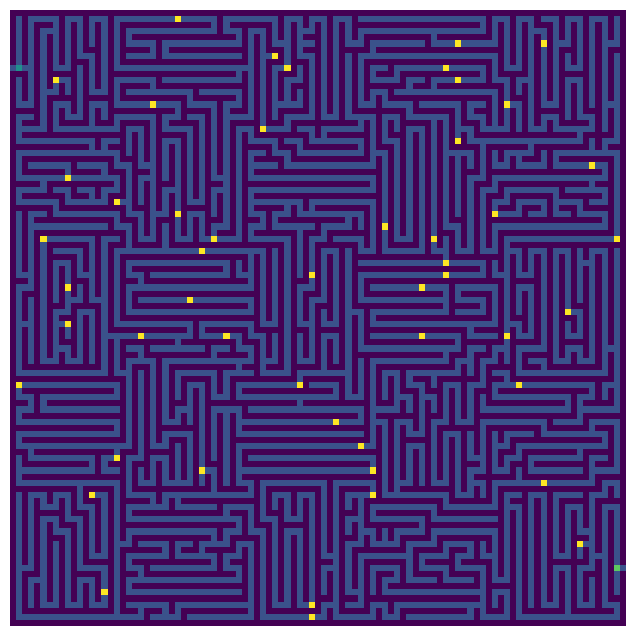

In [33]:
# Yellow: Slippery states
# Teal: Entrance
# Lime: Exit

import matplotlib
from pylab import *
figure(1)
plt.figure(figsize=(8, 8))
plt.axis('off')
imshow(maze_array, interpolation='none')

### DP Environment Set-up

In [34]:
for each in state_classes:
    zero_keys = []
    for key, value in each.actions.items():
        if value == 0:
            zero_keys.append(key)
    for z_key in zero_keys:
        del each.actions[z_key]

In [35]:
for each in state_classes:
    if each.status == 'e':
        for key in each.actions.keys():
            each.actions[key] = 0
            each.pre_v = 1000
            each.now_v = 1000

### Learning Algorithm Main Code (Dynamic Programming)

### Test (DP) Policy Iteration (Policy Evaluation + Policy Improvement)

In [36]:
stable_flag = 'false'
loop = 0
st = time.time()
tracemalloc.start()

while stable_flag == 'false'and loop <= 99:
    state_classes, k = policy_evaluation(list_state=state_classes, num_x_dir=num_state_x, num_y_dir=num_state_y)
    state_classes, stable_flag = policy_improve(list_state=state_classes, num_x_dir=num_state_x, num_y_dir=num_state_y)
    loop += 1
    
et = time.time()

first, second = tracemalloc.get_traced_memory()
tracemalloc.stop()

runtime = et-st


policy evaluated: 65 times
policy stability: false
policy evaluated: 68 times
policy stability: false
policy evaluated: 45 times
policy stability: false
policy evaluated: 30 times
policy stability: false
policy evaluated: 20 times
policy stability: false
policy evaluated: 15 times
policy stability: false
policy evaluated: 11 times
policy stability: false
policy evaluated: 8 times
policy stability: false
policy evaluated: 6 times
policy stability: false
policy evaluated: 5 times
policy stability: false
policy evaluated: 5 times
policy stability: false
policy evaluated: 4 times
policy stability: false
policy evaluated: 6 times
policy stability: false
policy evaluated: 5 times
policy stability: false
policy evaluated: 4 times
policy stability: false
policy evaluated: 4 times
policy stability: false
policy evaluated: 4 times
policy stability: false
policy evaluated: 6 times
policy stability: false
policy evaluated: 5 times
policy stability: false
policy evaluated: 4 times
policy stability:

In [37]:
if stable_flag == 'false':
    print(f"The number of Policy Iteration: {loop} (NOT converged)")
else:
    print(f"The number of Policy Iteration: {loop} (converged)")
print("")
print(f"Execution Time: {round(runtime, 2)} seconds")
print("")
print(f"Memory cost: {round((second - first) / 1024)} KB")


The number of Policy Iteration: 100 (NOT converged)

Execution Time: 52342.45 seconds

Memory cost: 629 KB


### Finding Path

In [38]:
path_list = []

# Find the starting state and add this to the path_list
for each in state_classes:
    if each.status == 's':
        start_state = each
        start_x = each.x
        start_y = each.y
        path_list.append(start_state)
        break
        

current_state = start_state
current_x = start_x
current_y = start_y


    
count = 0
while current_state.status != 'e':
    # Adding all the path to the path_list
    # from the start state, check the policy; find the max action; using the get_next_state function, find the next_state
    # while loop breaks when the current_state.status == 'e'

    max_keys = [key for key, value in current_state.actions.items() if value == max(current_state.actions.values())]

    if len(max_keys) == 1:
        max_action = max_keys[0]
    else:
        max_action = max_keys[0]

    next_path = get_next_state(x=current_x, y=current_y, action=max_action, x_max = num_state_x, y_max = num_state_y, state_classes = state_classes)
    
    path_list.append(next_path)
    current_state = next_path
    current_x = next_path.x
    current_y = next_path.y
    
    count += 1

    if count > num_state_x * num_state_y:
        print("Path NOT found")
        break

if count <= num_state_x * num_state_y:
    print("Path found:")
    for each in path_list:
        print(each.name)
    
    # Visualize the Path
    path_array = visualize_path(num_state_x = num_state_x, num_state_y = num_state_x, state_classes = state_classes, path=path_list)
    

Path NOT found
